In [1]:
# Cargar imágenes y etiquetas desde la estructura de carpetas asl_alphabet
import os
import cv2
import numpy as np

ruta_base = './asl_alphabet_train'  # Ajusta si tu ruta es diferente
TAMANO_IMG = 100

clases = sorted([d for d in os.listdir(ruta_base) if os.path.isdir(os.path.join(ruta_base, d))])
train = []
for idx, clase in enumerate(clases):
    ruta_clase = os.path.join(ruta_base, clase)
    for archivo in os.listdir(ruta_clase):
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            ruta_img = os.path.join(ruta_clase, archivo)
            img = cv2.imread(ruta_img)
            if img is not None:
                img = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = img.reshape(TAMANO_IMG, TAMANO_IMG, 1)
                train.append((img, idx))  # Tupla (imagen, etiqueta)

# NO crear X ni y como arrays aquí para evitar duplicación de datos y consumo de RAM
datos = {'train': train}
metadatos = {'clases': clases, 'total_imagenes': len(train), 'tamano_img': TAMANO_IMG}

print(f'Total de imágenes cargadas: {len(train)}')
print(f'Clases encontradas: {clases}')


Total de imágenes cargadas: 87000
Clases encontradas: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [2]:
# Mostrar información básica de los datos y metadatos (simulado)
print('Metadatos:')
print(metadatos)
print('Primer ejemplo:')
ejemplo_img, ejemplo_et = datos['train'][0]
print(f"Clase: {metadatos['clases'][ejemplo_et]}")
print(f"Tamaño imagen: {ejemplo_img.shape}")

Metadatos:
{'clases': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'], 'total_imagenes': 87000, 'tamano_img': 100}
Primer ejemplo:
Clase: A
Tamaño imagen: (100, 100, 1)


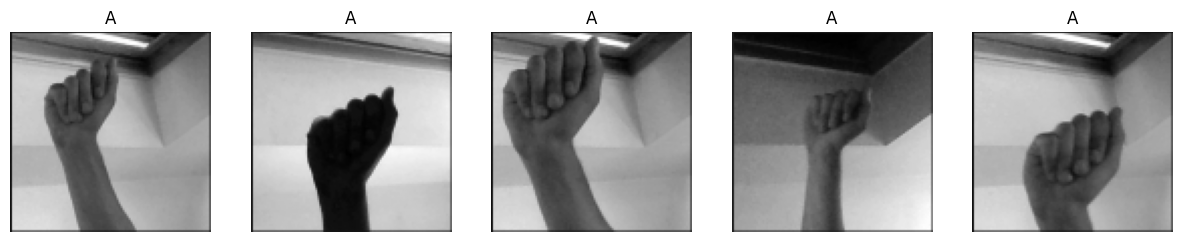

In [3]:
# Mostrar 5 ejemplos del set usando datos['train'] y metadatos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img, etiqueta = datos['train'][i]
    img = img.reshape(metadatos['tamano_img'], metadatos['tamano_img'])
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(metadatos['clases'][etiqueta])
    axs[i].axis('off')
plt.show()

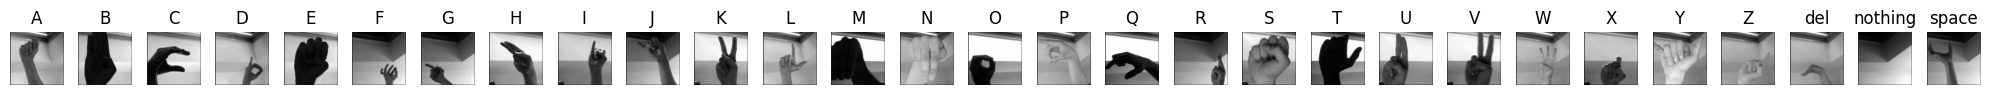

In [4]:
# Mostrar un ejemplo de cada clase usando datos['train'] y metadatos
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(metadatos['clases']), figsize=(20, 3))
for idx, clase in enumerate(metadatos['clases']):
    for img, et in datos['train']:
        if et == idx:
            img = img.reshape(metadatos['tamano_img'], metadatos['tamano_img'])
            axs[idx].imshow(img, cmap='gray')
            axs[idx].set_title(clase)
            axs[idx].axis('off')
            break
plt.tight_layout()
plt.show()

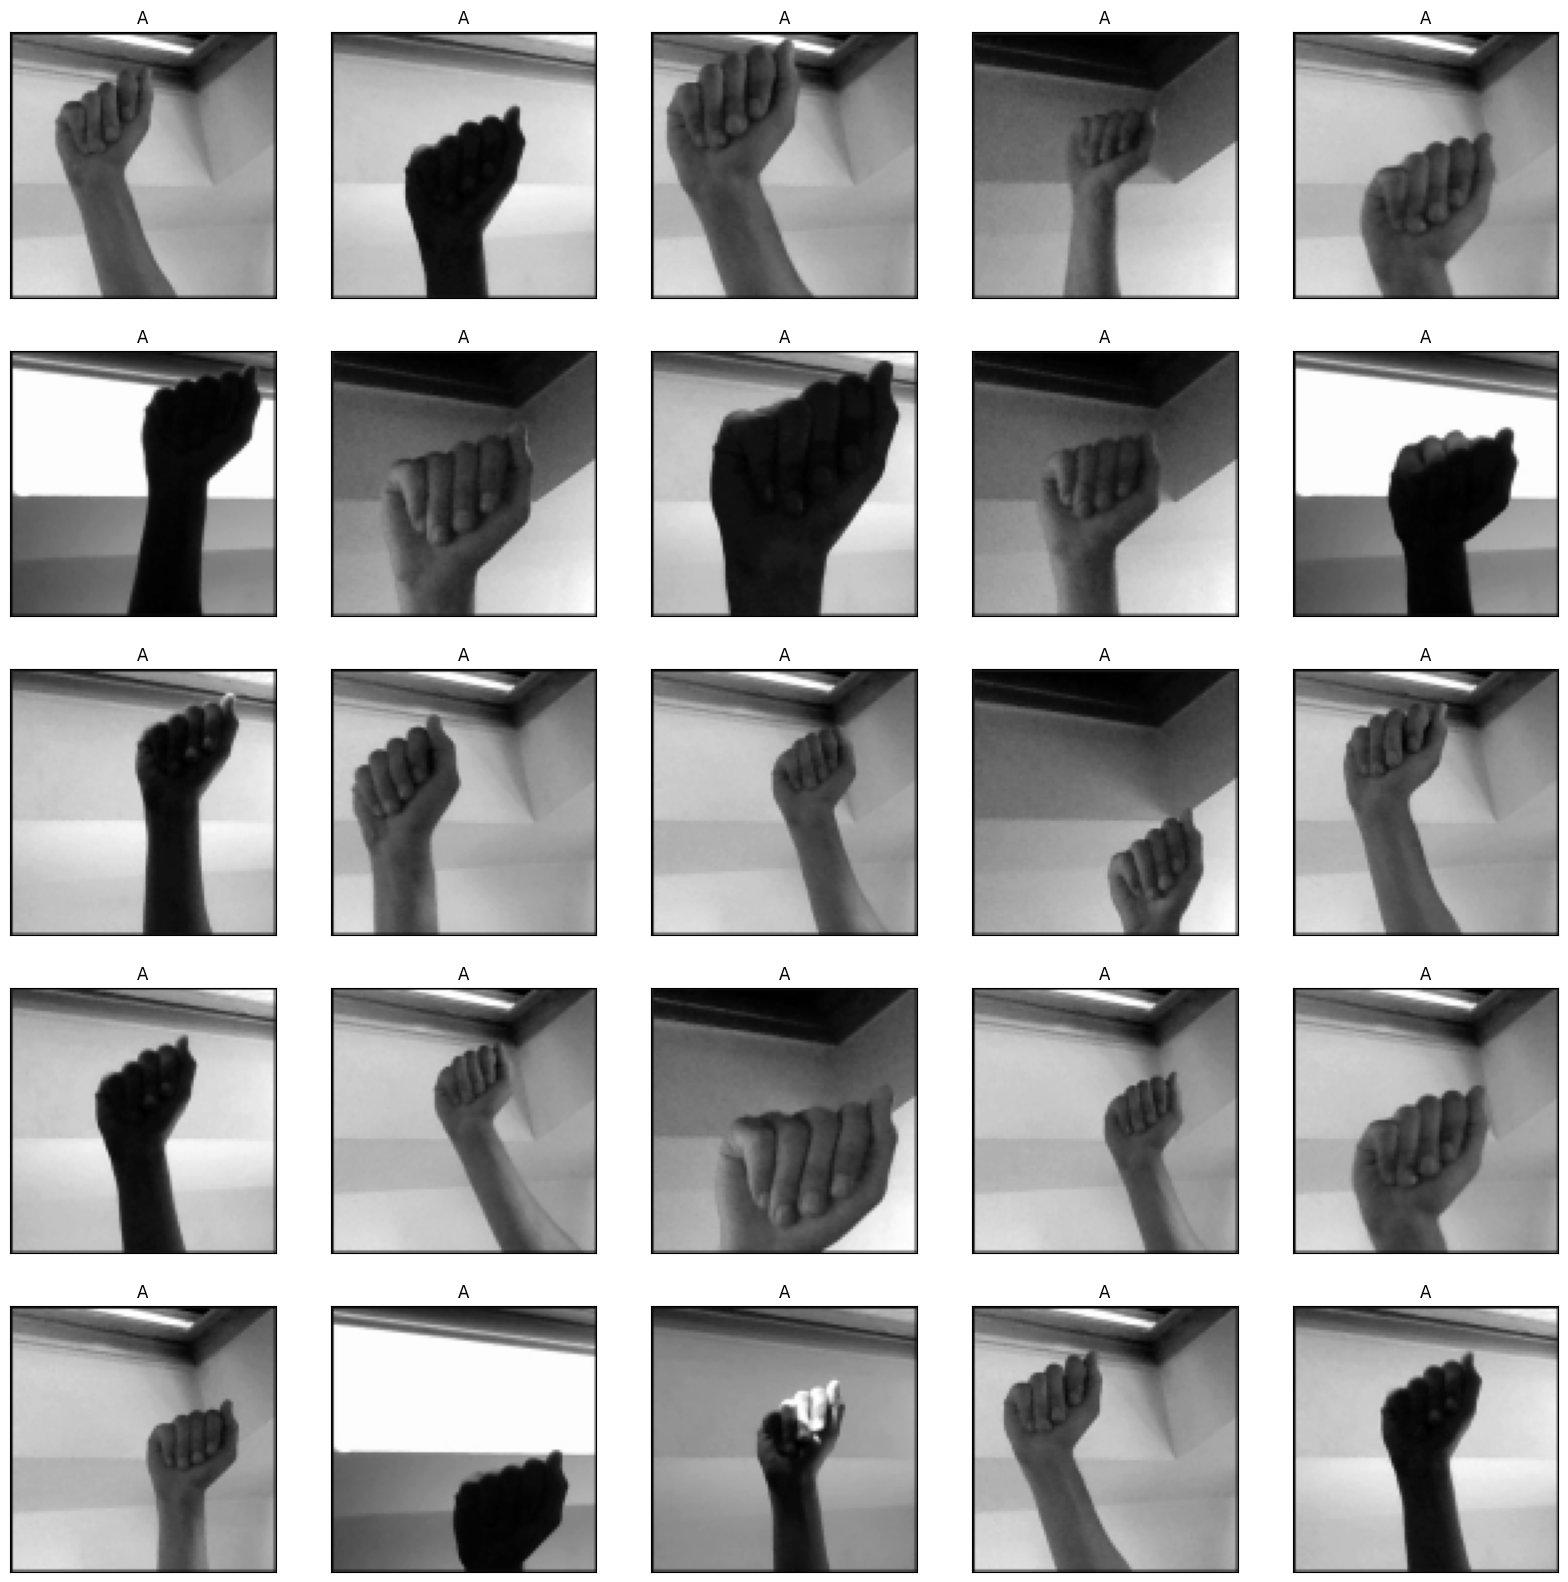

In [5]:
#Manipular y visualizar el set
#Lo pasamos a TAMANO_IMG (100x100) y a blanco y negro (solo para visualizar)
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'][:25]):
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')
  plt.title(metadatos['clases'][etiqueta])
plt.show()

In [6]:
#Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [8]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
  #imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [9]:
#Ver los datos del primer indice
datos_entrenamiento[0]

[array([[[ 29],
         [ 29],
         [ 28],
         ...,
         [ 29],
         [ 29],
         [ 30]],
 
        [[ 31],
         [119],
         [123],
         ...,
         [ 79],
         [104],
         [ 67]],
 
        [[ 30],
         [ 99],
         [100],
         ...,
         [101],
         [101],
         [ 66]],
 
        ...,
 
        [[ 30],
         [219],
         [222],
         ...,
         [173],
         [174],
         [102]],
 
        [[ 29],
         [220],
         [222],
         ...,
         [172],
         [174],
         [102]],
 
        [[ 29],
         [121],
         [122],
         ...,
         [100],
         [101],
         [ 64]]], dtype=uint8),
 0]

In [10]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

174000

In [11]:
# Preparar listas X (imagenes) y y (etiquetas) solo para normalización y entrenamiento
X = [imagen for imagen, etiqueta in datos['train']]
y = [etiqueta for imagen, etiqueta in datos['train']]

In [12]:
X

[array([[[ 29],
         [ 29],
         [ 28],
         ...,
         [ 29],
         [ 29],
         [ 30]],
 
        [[ 31],
         [119],
         [123],
         ...,
         [ 79],
         [104],
         [ 67]],
 
        [[ 30],
         [ 99],
         [100],
         ...,
         [101],
         [101],
         [ 66]],
 
        ...,
 
        [[ 30],
         [219],
         [222],
         ...,
         [173],
         [174],
         [102]],
 
        [[ 29],
         [220],
         [222],
         ...,
         [172],
         [174],
         [102]],
 
        [[ 29],
         [121],
         [122],
         ...,
         [100],
         [101],
         [ 64]]], dtype=uint8),
 array([[[ 29],
         [ 31],
         [ 29],
         ...,
         [ 29],
         [ 30],
         [ 29]],
 
        [[ 29],
         [ 61],
         [ 60],
         ...,
         [197],
         [197],
         [109]],
 
        [[ 29],
         [ 58],
         [ 59],
         ...,
      

In [13]:
# Normalizar los datos de las X (imagenes) en lotes para evitar problemas de memoria.
import numpy as np

def normalizar_en_lotes(X_lista, tamano_lote=100):
    X_normalizado = []
    for i in range(0, len(X_lista), tamano_lote):
        lote = np.array(X_lista[i:i+tamano_lote]).astype(float) / 255
        X_normalizado.append(lote)
    return np.concatenate(X_normalizado, axis=0)

# Asegurando que X no sea un array antes de la normalización
X = normalizar_en_lotes(X, tamano_lote=100)

: 

In [ ]:
# Mostrar la variable y (etiquetas) solo si está definida y es un array
try:
    print(y)
except Exception as e:
    print("La variable 'y' no está definida o no es un array. Ejecuta las celdas de normalización y conversión antes.")

La variable 'y' no está definida. Asegúrate de ejecutar las celdas de preparación de datos antes.


In [ ]:
# Convertir etiquetas en arreglo simple solo después de la normalización
y = np.array(y)

In [ ]:
X.shape

In [ ]:
#Crear los modelos iniciales para clasificación multiclase (ASL Alphabet, 29 clases)
# Usan softmax como salida y sparse_categorical_crossentropy como función de pérdida.
num_clases = len(metadatos['clases'])
modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(num_clases, activation='softmax')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(num_clases, activation='softmax')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(num_clases, activation='softmax')
])

In [ ]:
#Compilar modelos para clasificación multiclase (ASL Alphabet, 29 clases)
modeloDenso.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

In [ ]:
#Cargar la extension de tensorboard de colab
%load_ext tensorboard

In [ ]:
#Ejecutar tensorboard e indicarle que lea la carpeta "logs"
%tensorboard --logdir logs

In [ ]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN])

In [ ]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN2])

In [ ]:
#ver las imagenes de la variable X sin modificaciones por aumento de datos
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

In [ ]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [ ]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [ ]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [ ]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

In [ ]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

In [ ]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

In [ ]:
modeloCNN_AD.save('perros-gatos-cnn-ad.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras perros-gatos-cnn-ad.h5 carpeta_salida